## Supervised Learning: Challenge

During this challenge, we will be working on the credit card fraud prediction. You can download the data from [here](https://drive.google.com/file/d/1FCQY1SiWIjh_ME6Wtb3FG8Y1sKoRwAUc/view?usp=sharing). The data is originally from [Kaggle Competition](https://www.kaggle.com/mlg-ulb/creditcardfraud).

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

**Challenge:** Identify fraudulent credit card transactions.

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

> #### Warning
> There is a huge class imbalance ratio so we need to be careful when evaluating. It might be better to use method `.predict_proba()` with custom cut-off to search for fraudelent transactions.

In [208]:
# import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import seaborn as sns
import xgboost as xgb

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.tree import export_graphviz

import graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus
import os
import copy
import datetime

%matplotlib inline

In [153]:
# 284807 x 31
data = pd.read_csv('creditcard.csv', header = 0)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [154]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

# All independent into SVM

### Poly

In [5]:
SVM = svm.SVC(kernel = "poly")
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
con_mat = metrics.confusion_matrix(y_test,y_pred)
con_mat

array([[85308,     0],
       [  135,     0]])

In [6]:
metrics.accuracy_score(y_test,y_pred)

0.9984199992977775

### RBF

In [7]:
SVM = svm.SVC(kernel = "rbf")
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
con_mat = metrics.confusion_matrix(y_test,y_pred)
con_mat

array([[85308,     0],
       [  135,     0]])

In [8]:
metrics.accuracy_score(y_test,y_pred)

0.9984199992977775

# Naive Bayes

In [157]:
#data
#data_0 = data[data['Class'] == 0]
#data_0

In [158]:
#sns.distplot(data_0.V24)

In [159]:
gnb = GaussianNB()

In [160]:
gnb.fit(X_train, y_train) 

GaussianNB()

In [161]:
y_pred = gnb.predict(X_test)

In [162]:
metrics.accuracy_score(y_test,y_pred)

0.9924159966293319

In [163]:
con_mat = metrics.confusion_matrix(y_test,y_pred)
con_mat

array([[84686,   595],
       [   53,   109]])

In [164]:
sum(y_test)

162

# Undersampling

In [167]:
# Class count
count_class_0, count_class_1 = data.Class.value_counts()

# Divide by class
data_class_0 = data[data['Class'] == 0]
data_class_1 = data[data['Class'] == 1]

In [168]:
data_class_0_under = data_class_0.sample(count_class_1)
data_under = pd.concat([data_class_0_under, data_class_1], axis=0)

print('Random under-sampling:')
print(data_under.Class.value_counts())

Random under-sampling:
1    492
0    492
Name: Class, dtype: int64


In [169]:
data_under = data_under.sample(frac=1).reset_index(drop=True)
data_under

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,144294.0,2.061777,-0.041485,-1.058479,0.417426,-0.137964,-1.216341,0.192753,-0.342173,0.523384,...,-0.287353,-0.687960,0.339932,0.049481,-0.295653,0.194995,-0.069963,-0.059599,1.79,0
1,172348.0,2.038278,0.198144,-1.734459,0.515580,0.236668,-1.391897,0.286938,-0.383104,0.553431,...,0.204669,0.769628,-0.032565,-0.139852,0.253668,-0.095694,0.000959,-0.030442,11.37,0
2,133184.0,-1.212682,-2.484824,-6.397186,3.670562,-0.863375,-1.855855,1.017732,-0.544704,-1.703378,...,1.396872,0.092073,-1.492882,-0.204227,0.532511,-0.293871,0.212663,0.431095,1335.00,1
3,141524.0,0.025977,0.533894,-1.191769,-1.727196,2.920477,3.408321,0.351968,0.924018,-0.167337,...,-0.263639,-0.716622,0.118396,0.688015,-0.458492,0.161805,0.263906,0.090550,5.99,0
4,32686.0,0.287953,1.728735,-1.652173,3.813544,-1.090927,-0.984745,-2.202318,0.555088,-2.033892,...,0.262202,-0.633528,0.092891,0.187613,0.368708,-0.132474,0.576561,0.309843,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,67857.0,-1.739334,-1.304655,0.314103,0.053740,-0.058696,0.071260,0.694862,-0.313270,-0.649377,...,-0.665172,-0.632078,-0.421176,-0.400774,-0.001640,-0.495162,0.031633,0.066280,320.00,1
980,93853.0,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,...,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,316.06,1
981,154197.0,-3.377409,-0.875164,-3.313172,0.109019,1.653239,-1.938749,1.449613,-0.203814,0.503379,...,-0.066409,1.900572,0.963391,-0.289807,-0.403511,-0.037650,1.099396,1.346125,106.49,0
982,76825.0,-0.416285,0.588658,1.185738,-2.091479,0.033349,-1.322596,1.001690,-0.247473,0.724273,...,0.113082,0.615876,-0.270214,0.511572,-0.020916,-0.865917,0.228222,-0.024121,1.00,0


In [170]:
X = data_under.drop('Class', axis = 1)
y = data_under['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

# SVM

### Poly

In [46]:
SVM = svm.SVC(kernel = "poly")
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
con_mat = metrics.confusion_matrix(y_test,y_pred)
con_mat

array([[ 56,  99],
       [ 38, 103]])

In [47]:
metrics.accuracy_score(y_test,y_pred)

0.5371621621621622

### rbf

In [48]:
SVM = svm.SVC(kernel = "rbf")
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
con_mat = metrics.confusion_matrix(y_test,y_pred)
con_mat

array([[75, 80],
       [45, 96]])

In [49]:
metrics.accuracy_score(y_test,y_pred)

0.5777027027027027

# Naive bayes

In [171]:
gnb = GaussianNB()
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.8513513513513513

In [172]:
con_mat = metrics.confusion_matrix(y_test,y_pred)
con_mat

array([[145,   0],
       [ 44, 107]])

# Oversampling

In [456]:
# Class count
count_class_0, count_class_1 = data.Class.value_counts()
# Divide by class
data_class_0 = data[data['Class'] == 0]
data_class_1 = data[data['Class'] == 1]

In [457]:
print(count_class_0)
print(count_class_1)

284315
492


In [400]:
data_class_1_over = data_class_1.sample(count_class_0, replace = True)
data_over = pd.concat([data_class_1_over, data_class_0], axis=0)

print(data_over.Class.value_counts())

1    284315
0    284315
Name: Class, dtype: int64


In [401]:
data_over  = data_over.sample(frac=1).reset_index(drop=True)
data_over 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,156627.0,-0.133727,1.052124,-0.474298,-0.666742,0.694496,-0.620680,0.798116,0.116516,0.094418,...,-0.329171,-0.840537,0.131661,0.616733,-0.465911,0.096295,0.317867,0.131662,10.76,0
1,43369.0,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,0.183961,...,2.070008,-0.512626,-0.248502,0.126550,0.104166,-1.055997,-1.200165,-1.012066,88.00,1
2,25095.0,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,0.411135,...,-0.377503,-0.889597,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605,3.12,1
3,127739.0,-2.564231,-4.785287,-1.300657,-0.589793,5.449142,-4.870094,-1.829964,-0.419558,-0.975617,...,1.081863,1.920132,0.849055,1.218187,-0.988068,-0.150630,-0.055534,0.201689,10.00,0
4,170028.0,-0.178337,1.026973,0.157718,-0.665094,0.416159,-1.021489,0.972965,-0.158472,0.169949,...,-0.291811,-0.593567,0.075308,-0.098105,-0.449154,0.152863,0.356235,0.155428,1.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,41397.0,-14.970346,8.401421,-16.867238,8.252334,-13.565130,-2.782438,-14.263735,9.643419,-7.701499,...,2.714045,-0.101355,-0.439666,0.519514,0.789328,0.064357,-1.621386,-1.104819,273.01,1
568626,57163.0,-10.363049,4.543672,-9.795898,5.508003,-6.037156,-0.133493,-11.724346,-3.198346,-4.767842,...,-2.457145,1.687257,0.977178,-0.543369,-0.289125,-0.107586,0.330642,0.163577,1.00,1
568627,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
568628,75849.0,1.207149,1.198063,-1.397083,1.788805,0.434367,-2.173857,0.681740,-0.331268,-0.243732,...,-0.193027,-0.537324,-0.124465,0.549680,0.732565,-0.322035,0.030126,0.099137,1.99,0


In [402]:
X = data_over.drop('Class', axis = 1)
y = data_over['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

# Naive Bayes (too many rows, not trying SVM)

In [403]:
gnb = GaussianNB()
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test)
y_proba = gnb.predict_proba(X_test)

In [404]:
print(metrics.accuracy_score(y_test,y_pred))
metrics.recall_score(y_test,y_pred)

0.8656302575195353


0.7404785584742292

In [230]:
con_mat = metrics.confusion_matrix(y_test,y_pred)
con_mat

array([[84225,   769],
       [22414, 63181]])

# Optimal cutoff 

In [179]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})

Area under the ROC curve : 0.866624


In [180]:
roc

,fpr,tpr,1-fpr,tf,thresholds
0,0.000000,0.000000,1.000000,-1.000000,2
1,0.008864,0.742111,0.991136,-0.249025,1
2,1.000000,1.000000,0.000000,1.000000,0


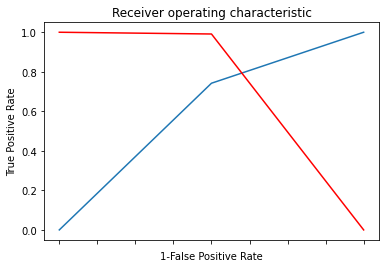

In [181]:
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])
plt.show()

In [ ]:
### maybe try gridsearch

In [182]:
cutoff = 0.74
fitted_results = pd.DataFrame(y_proba)

In [183]:
new_cutoff = []
for i in range(len(y_proba)):
    if y_proba[i][1] >= cutoff:
        new_cutoff.append(1)
    else:
        new_cutoff.append(0)

### New accuracy

In [184]:
metrics.accuracy_score(y_test,new_cutoff)

0.8511920463804817

In [185]:
con_mat = metrics.confusion_matrix(y_test,new_cutoff)
con_mat

array([[84690,   715],
       [24670, 60514]])

# XGB classifier

In [433]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [434]:
sum(y)

492

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [436]:
# sum(negative instances) / sum(positive instances)
scale_weight = 284315/492
scale_weight

577.8760162601626

In [437]:
xg_class = xgb.XGBClassifier(scale_pos_weight = scale_weight, n_jobs = -1, )

In [438]:
xg_class.fit(X_train,y_train)
y_pred = xg_class.predict(X_test)

In [439]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.9996371850239341
0.9629629629629629
0.8333333333333334


In [440]:
con_mat = metrics.confusion_matrix(y_test,y_pred)
con_mat

array([[85282,     5],
       [   26,   130]])

# Adaboosting NaiveBayes

In [449]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [451]:
naive = GaussianNB()
ada_naive = AdaBoostClassifier(base_estimator=naive)
ada_naive.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=GaussianNB())

In [452]:
y_pred = ada_naive.predict(X_test)

In [453]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.9919595519820231
0.09531013615733737
0.4144736842105263


In [454]:
con_mat = metrics.confusion_matrix(y_test,y_pred)
con_mat

array([[84693,   598],
       [   89,    63]])

# Bagging Naive Bayes (not Bootstrap)

In [406]:
data.shape

(284807, 31)

In [407]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [409]:
train_data = X_train.merge(y_train, left_index=True, right_index=True)
train_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
161145,113921.0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,...,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89,0
204520,135319.0,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,...,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98,0
182659,125498.0,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,...,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10,0
25117,33520.0,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,...,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96,0
227642,145152.0,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,...,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,...,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89,0
86293,61167.0,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,...,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99,0
122579,76616.0,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,...,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90,0
152315,97253.0,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,...,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31,0


In [410]:
# Class count
count_class_1 = sum(train_data['Class'])
count_class_0 = train_data.shape[0] - count_class_1
print(count_class_1, count_class_0)

345 199019


In [411]:
iterations = int(np.floor(count_class_0 / count_class_1))
iterations

576

In [412]:
not_fraud_0 = train_data[train_data['Class'] == 0]
fraud_1 = train_data[train_data['Class'] == 1]

In [413]:
for i in range(iterations):
    x_boot = not_fraud_0.sample(count_class_1)
    new_data = pd.concat([x_boot, fraud_1], axis=0)
    new_data = new_data.sample(frac=1).reset_index(drop=True)
    x_train = new_data.drop('Class', axis = 1)
    y_train = new_data['Class']
    
    if i == 0:
        gnb = GaussianNB()
        gnb.fit(x_train, y_train) 
        sum_y_pred = gnb.predict(X_test)
        sum_y_proba = gnb.predict_proba(X_test)
    else:
        gnb = GaussianNB()
        gnb.fit(x_train, y_train) 
        sum_y_pred += gnb.predict(X_test)
        sum_y_proba += gnb.predict_proba(X_test)

In [414]:
avg_pred = sum_y_pred/iterations
avg_proba = sum_y_proba/iterations

In [415]:
cutoff = 0.75

### average predicted

In [427]:
new_cutoff = []
for i in range(len(avg_pred)):
    if avg_pred[i] >= cutoff:
        new_cutoff.append(1)
    else:
        new_cutoff.append(0)

In [428]:
print(metrics.accuracy_score(y_test,new_cutoff))
print(metrics.precision_score(y_test,new_cutoff))
print(metrics.recall_score(y_test,new_cutoff))

0.9913743665367555
0.12846347607052896
0.6938775510204082


In [429]:
con_mat = metrics.confusion_matrix(y_test,new_cutoff)
con_mat

array([[84604,   692],
       [   45,   102]])

### average probability

In [430]:
new_cutoff = []
for i in range(len(avg_proba)):
    if avg_proba[i][1] >= cutoff:
        new_cutoff.append(1)
    else:
        new_cutoff.append(0)

In [431]:
print(metrics.accuracy_score(y_test,new_cutoff))
print(metrics.precision_score(y_test,new_cutoff))
print(metrics.recall_score(y_test,new_cutoff))

0.9915382184614304
0.12886597938144329
0.6802721088435374


In [432]:
con_mat = metrics.confusion_matrix(y_test,new_cutoff)
con_mat

array([[84620,   676],
       [   47,   100]])